>>> ## Supervised Learning - Part II (Chapter 5)

From Tuesday's class, you had an opportunity learn few more classification methods and modules to validate.

    Cross-Validation
    Learning Curves
    Support Vector Machines
    Random Forest
    
* In previous lab session, we looked into KNN, preformance metrics, confusion matrix and scikit plot.

* In this lab session, we will look into the following

    * We can look into importing and loading the MNIST Data and install the required libraries (If someone is still facing the trouble loading)
    * SciKit learning methods and useful functions
    * SVM's different Kernels, features and ways to tune the model
    * Similarly Random forest and its model tuning 


Please also download, the week-05 jupyter notebook file, there are explanations that might be necessary to get insightful.

### Useful Links: 
#### http://scikit-learn.org/stable/index.html

In [3]:
# """ Decision boundary plotting function from Hands-On Machine Learning with Scikit-Learn
# and TensorFlow """

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    
    
# Function adapted from source: https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X
               [:, 0], X[:, 1], c=y, s=30, cmap=cmap,clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Perform the following steps:
* Import library numpy, matplotlib, datasets, neighbors, metrics, model selection libraries
* Load cancer std dataset using sklearn datasets and assign to "cancer"
* Look into the various attributes cancer

    

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

print("key data: {}".format(cancer.keys()))


key data: ['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [4]:
dir(cancer)
print(cancer.data.shape)
print(cancer.target_names)
# print(cancer.DESCR)
print('cancer dataset features:', cancer.feature_names)

(569, 30)
['malignant' 'benign']
('cancer dataset features:', array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23'))


From the link, additional functions and its attributes are illustrated. 

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Lets have a very quick recap of KNN and model fitting
Perform the below actions:
* From the sklearn model selection module import train test split, use features like random_state, stratify 
* Use KNN method with 3 neighbors


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=70)

""" No of neighbors can be fixed as shown below, but is not efficient. we do not know the model 
characteristic beforehand and hence to evaluate  """
clf = KNeighborsClassifier(n_neighbors=3) 

### 1. Compute and visualize the training and testing accuracies when number of neighbors in KNN is changed from 1 to 30

Use the following parameters 
* Test size  = 0.3 
* To maintain consistency among students, let use random state and of 55, 60, 65 and 70
* use a for loop to test knn classifiers from 1 to 30 neighbors, inside looping function you will have to build the knn, train the model and compute the score i.e., knn.score (Xtest, ytest)
* The training and testing accuracy for each neighbor (iteration) can be stored and plotted after looping
* At what choice do you observe large variance and which random state do ML converge
* What is the difference between this plot vs the one discussed in learning curves in class?
* look into time module in python, you can make a note of time to train the model for each iteration, this could be used in the below sections

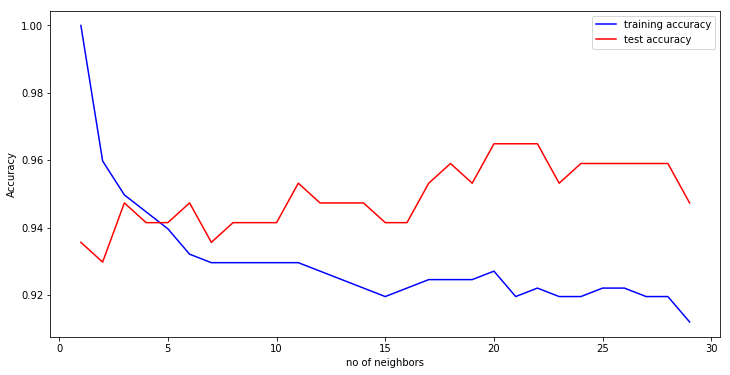

In [6]:
import time
training_accuracy = []
test_accuracy = []
dur_time = []

# cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=65, 
                                                    test_size=0.3)
neighbors_value = range(1, 30)

for n_neighbors in neighbors_value:    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the Knn
    t1 = time.time()
    clf.fit(X_train, y_train) # fit the model
    t2 = time.time()
    dur_time.append(t2-t1)

    # Scoring the training function 
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Scoring the testing function 
    test_accuracy.append(clf.score(X_test, y_test))
    

# Out of loop, now plotting the array of testing and training accuracies    
plt.figure(figsize=(12,6))    
plt.plot(neighbors_value, training_accuracy, label="training accuracy", c = 'b')
plt.plot(neighbors_value, test_accuracy, label="test accuracy", c= 'r')

plt.ylabel("Accuracy")
plt.xlabel("no of neighbors")
plt.legend()

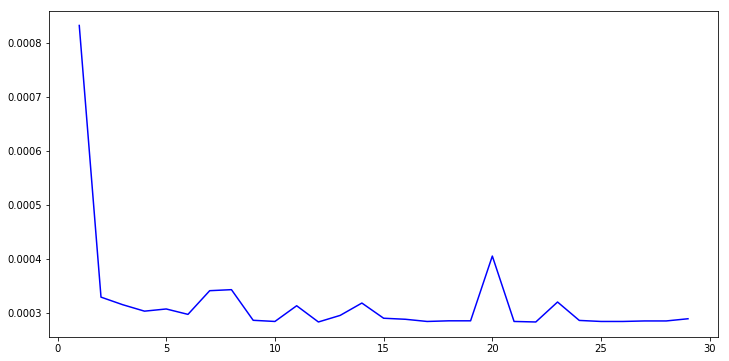

In [7]:
""" use plot to visualize the duration vs n_neighbors """

plt.figure(figsize=(12,6))
plt.plot(neighbors_value, dur_time, label="training accuracy", c = 'b')

* Similar to the previous lab sesssion, we can make use of scikit plot visualization to look into the learning curves of training scores and cross-validation scores
 * Consider a neighbor which seems to have a good training accuarcy from the above fig
 * Use plot_learning_curve 
 * http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [7]:
# !pip install scikit-plot

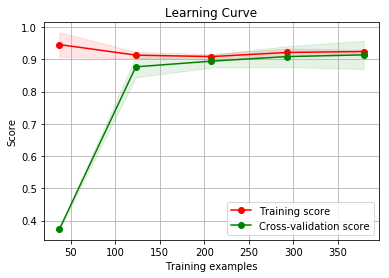

In [8]:
import scikitplot as skplt
clf = KNeighborsClassifier(n_neighbors=25) 
skplt.estimators.plot_learning_curve(clf, cancer.data, cancer.target)

## 2. Support Vector Machines
The following reference from Tuesday class gives be very good overview of SVM classifiers and other advanced methods.
Refer to page 16 of the presentation link. SVM classification with kernel trick is visualized. 
https://med.nyu.edu/chibi/sites/default/files/chibi/Final.pdf


Some of the different kernels that can be accessed by Scikit learn are shown below. 
* Linear 
* Gaussian 
* Exponential
* Polynomial 
* hybrid
* Sigmoidal

Read the below reference for accessing kernels in scikit learn
http://scikit-learn.org/stable/modules/svm.html#svm-kernels

We will use Linear, Gaussian and polynominal for current dataset problem and possibly we could try different kernel approach during regression lab session. 

Do the following:
        - The cancer dataset needs to be loaded for working on the below problem
        - Import necessary svm modules

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
cancer = datasets.load_breast_cancer()

In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='|S23')

## 2.1. For simiplicity lets consider only the first two features for classification i.e., mean radius and mean texture

In [11]:
# Take mean radius and mean texture for cancer classification data, assign to "X" and cancer target names to "y"

X = cancer.data[:, :2]
y = cancer.target

    - Using link provided above for reference, build SVM with different kernel type and use default c, gamma, degree, coeff0 necessary
    - Note: each svm kernel type attribute differs

### A.) Apply "linear Kernel" and observe what happens with different values of gamma and C 

In [13]:
# Using SVC fit complete data of cancer data and target features 
t1 = time.time()
svc = svm.SVC(kernel='linear', C=1.0 ,gamma='auto')
svc.fit(X,y)
t2 = time.time()
print("Total duration of fitting: {} s".format(t2-t1))

Total duration of fitting: 0.00587892532349 s


###  Once, we have fit the linear SVC kernel, use function plot_predictions function to visualize the classifiers and data

Text(0.5,1,'SVC with linear kernel')

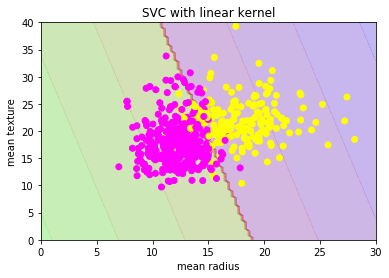

In [19]:
""" Use the function provided in the early cell plot_prediction to visualize """
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with linear kernel')

#### Observe what happens when you fine tune the values of C and gamma ? 

    - Similar to linear kernel, train the svc for rbf kernel and visualize. Observe the pattern for different values of c and gamma functions

### B.) Apply "rbf Kernel" and observe what happens with different values of gamma and C 

In [21]:
# for SVC from svm, use 
t1 = time.time()
svc = svm.SVC(kernel='rbf', C=1, gamma="auto").fit(X, y)
t2 = time.time()
print("Total duration of fitting: {} s".format(t2-t1))
# svc = svm.SVC(kernel='rbf', C=100, gamma=0.01).fit(X, y)

Total duration of fitting: 0.00989603996277 s


###  Once, we have fit the rbf SVC kernel, use function plot_predictions function to visualize the SVC working


Text(0.5,1,'SVC with rbf kernel')

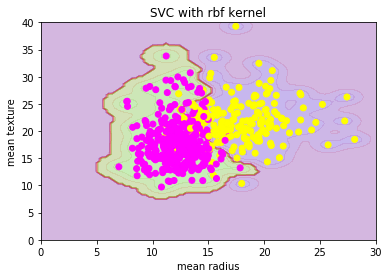

In [22]:
plot_predictions(svc, [0,30,0,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with rbf kernel')

    - Similar to linear kernel, train the svc for poly kernel and visualize. 
    - Do you still need gamma? 
    - Check what all attributes are useful for this kernel, please look into link or sckikit learn help
    - Change for different degrees starting from 1 to 5
    - There might be a case, where jupyter notebook takes almost impossible time to train. In this case, you may need to interrupt the Jupyter Kernel and restart 

### C.) Apply "polynomial Kernel" and observe what happens with different values of degree, C & Coeff 

#### Try for degree  = 1, 3, 5 and 10

In [31]:
# # for SVC  
t1 = time.time()
svc = svm.SVC(kernel='poly', degree = 3, C=1 , coef0=1).fit(X, y)
t2 = time.time()
print("Total duration of fitting: {} s".format(t2-t1))

Total duration of fitting: 9.26386284828 s


Text(0.5,1,'SVC with polynomial kernel')

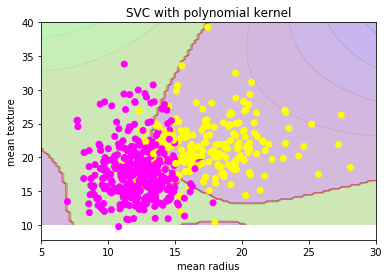

In [32]:
plot_predictions(svc, [5,30,10,40])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring_r)
plt.title('SVC with polynomial kernel')

### Observations:
1. What do you observe as you increase the degree of polynomial (with respect to the plot and time for computation)
2. See what happens when d=1 and linear kernel problem
3. In this case how do you know that degree of polynomial you have reached is optimal ?
4. What do you think of Pros and Cons of SVM


### Solutions

1. As we keep increasing the degree of polynomial, the model computation time is large and large. For a given d, the model overfits

2. d = 1 and linear kernel is same.

3. When we observe that the model is overfitted, it is the indication that we need to reduce the degree.

4. Pros and cons are quoted from https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

    **Pros:**
    * It works really well with clear margin of separation
    * It is effective in high dimensional spaces.
    * It is effective in cases where number of dimensions is greater than the number of samples.
    * It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    
   **Cons:**
    * It doesn’t perform well, when we have large data set because the required training time is higher
    * It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
    * SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.

## 2.2. Now that you have been introduced to fine tunning of parameters, apply SVC to complete dataset and observe the score.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)


# for practice use linear kernel model with penalty factor for error = 1 and kernel coefficient of 0.1  
svmclf = svm.SVC(kernel='linear', C=0.5)
svmclf.fit(X_train, y_train)
print ('Score:', svmclf.score(X_train, y_train))

predicted = svmclf.predict(X_test)
# print(predicted)

('Score:', 0.9673366834170855)


In [19]:
svmclf = svm.SVC(kernel='rbf', C=0.5, gamma="auto")
svmclf.fit(X_train, y_train)
print ('Score:', svmclf.score(X_train, y_train))

# predicted= svmclf.predict(X_test)
# print(predicted)

('Score:', 0.6557788944723618)


In [20]:
svmclf = svm.SVC(kernel='poly', degree=1, C=5 , coef0=1)
svmclf.fit(X_train, y_train)
print ('Score:', svmclf.score(X_train, y_train))

# predicted= svmclf.predict(X_test)
# print(predicted)

('Score:', 0.957286432160804)


# Decision Tree code from class

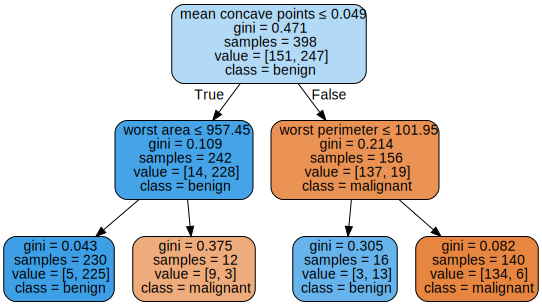

In [33]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=2)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state = 5)
dt.fit(x_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Random Forest

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


## 1. Develop RF classifier and fine tune the parameter to optimize the result.

- Import the necessary modules for random forest classifiers
- Use random state = 5
- test size = 40%
- check the score
- check the classification report

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.4, random_state=5)

/home/campus11/nkattapr/.local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
RFmodel = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs= -1)
RFmodel.fit(X_train, y_train)
print ('Score:', RFmodel.score(X_train, y_train))

('Score:', 0.9941348973607038)


In [37]:
from sklearn.metrics import classification_report
yhat = RFmodel.predict(X_test)
result = classification_report(yhat, y_test)
print(result)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96        77
          1       0.98      0.98      0.98       151

avg / total       0.97      0.97      0.97       228



## 2. Using the Random Forest classifier, identify the top 3 features in dataset that has a higher significance in detection of cancer anamoly 

Feature importances:
[0.04211623 0.00853576 0.05397945 0.01347917 0.00779559 0.01272977
 0.101112   0.10363823 0.00400103 0.00255512 0.01893732 0.0030203
 0.00764482 0.02457346 0.00283058 0.00217263 0.00403122 0.00515443
 0.00622773 0.00490148 0.09247505 0.01627295 0.11033424 0.11590324
 0.00889196 0.02021056 0.06537503 0.12425812 0.01091977 0.00592276]


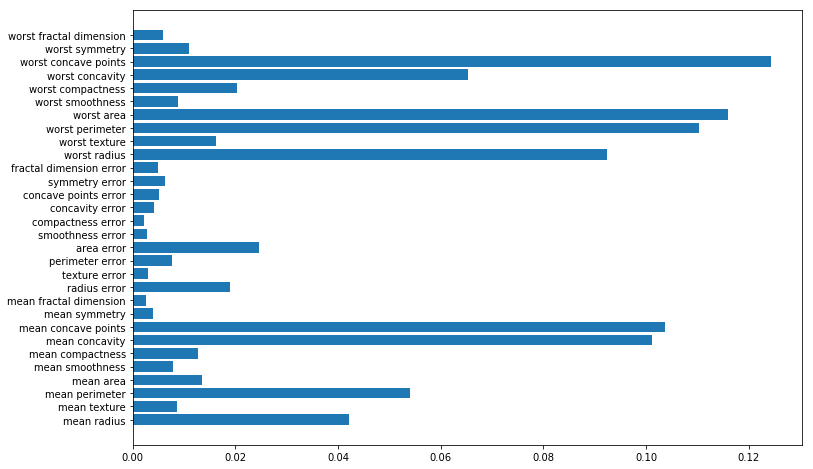

In [38]:
print("Feature importances:\n{}".format(RFmodel.feature_importances_))
plt.figure(figsize=(12,8))
plt.barh(range(cancer.data.shape[1]), RFmodel.feature_importances_)
plt.yticks(np.arange(cancer.data.shape[1]), cancer.feature_names)
plt.show()

## Solution:

### Apparently from the random forest feature output, worst concave points, worst perimeter and worst radius has higher significance
    

### Discussion about the visualizing the tree from random forest

https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c

http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

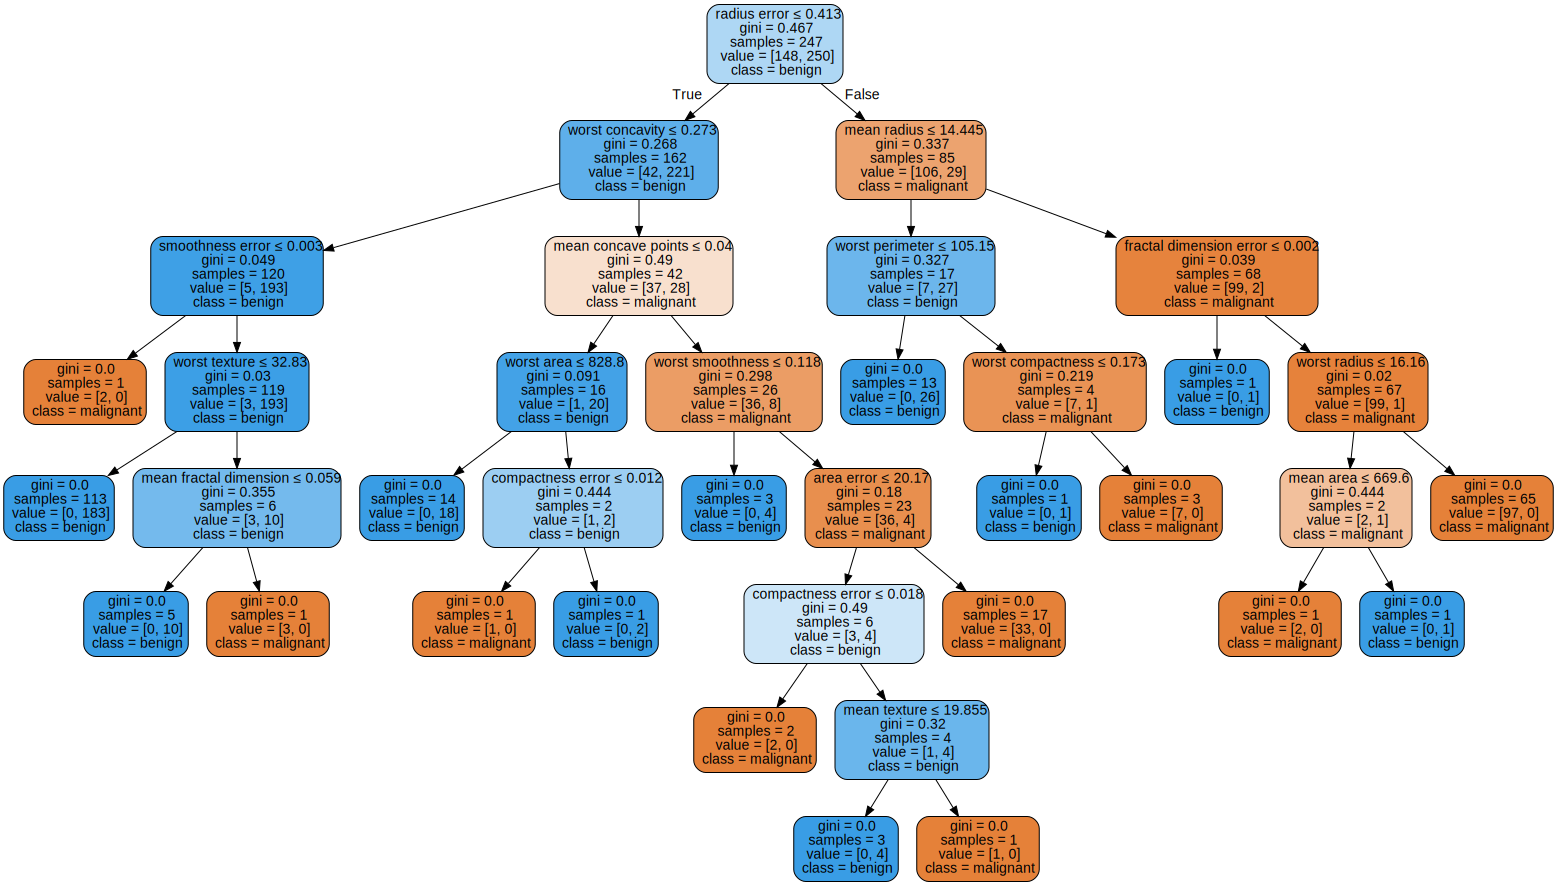

In [39]:
# We can modify the code for Decision Tree visualization to Random forest
from sklearn import tree

dt = RandomForestClassifier(n_estimators=50)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state = 5)
dt.fit(x_train, y_train)

import graphviz 
dt1 = dt.estimators_[4]
dot_data = tree.export_graphviz(dt1, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 3. Fine tunning parameters for RF

    - Lets visualize the RF based classifiers and dataset as shown in the previous section about SVM
    - Make sure, you are training the model with only two features (it is upto you).
    - Based on important features, I found column 3 and 8 are cruicial for proper classification
    - Using function visualize_classifier(), visualize the RF and scatter plots of data
    
    ex:
    visualize_classifier(classifier, iris.data[:, :2], iris.target)
    

/home/campus11/nkattapr/.local/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


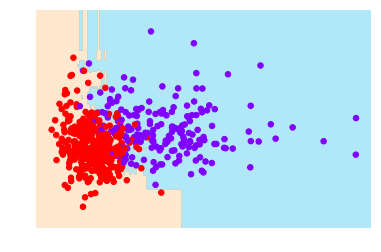

In [40]:
# develop the random forest model with 50 estimators
RFmodel = RandomForestClassifier(n_estimators=50)
visualize_classifier(RFmodel, cancer.data[:, (3,8)], cancer.target)

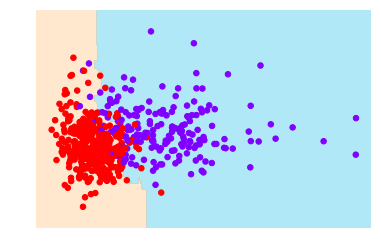

In [61]:
# develop the random forest model with 500 estimators

RFmodel = RandomForestClassifier(n_estimators=500, max_leaf_nodes=10, n_jobs= -1)
visualize_classifier(RFmodel, cancer.data[:, (3,8)], cancer.target)

### Do you observe any overfitting or underfitting for any change in parameter change? Make a note of, if yes

### To fine tune the parameters, we need some validation method to support. Use the kfold validation method explained in class
* In class, you had worked on kFold with Decision Tree, on the similar code lines, random forest can be realized. Adapt the code to include Random Forest 
* Run for different levels of complexity C = 1 to 9
* n_folds = 5
* random_state for test train to be 3
* What is the max and min of accuracy scores for each complexities

/home/campus11/nkattapr/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mean accuracy: [0.91743518 0.94028878 0.9438286  0.94733737 0.94733737 0.95084614
 0.95084614 0.95435491 0.        ]
Selected model index: 7
Complexity: 9


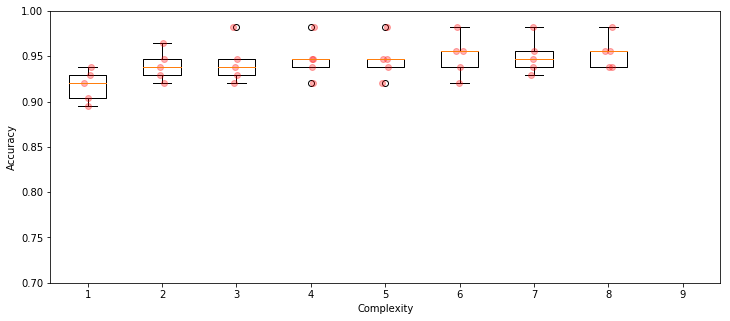

In [62]:
from sklearn import cross_validation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state = 3)

#Create a 5-fold cross validation set
kf=cross_validation.KFold(n=cancer.data.shape[0], n_folds=5, shuffle=True)
      
#S possible hyper-parameters to check for the decision tree
C=np.arange(2,10,)

# we'll run 9 different models, C = 1 .. 9 
acc = np.zeros((5,9))
i=0
for train_index, test_index in kf:
    x_train, x_test = cancer.data[train_index], cancer.data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]
    j=0
    for c in C:
        dt = RandomForestClassifier(n_estimators=500, max_leaf_nodes=c, n_jobs= -1)
        dt.fit(x_train,y_train)
        yhat = dt.predict(x_test)
        acc[i][j] = metrics.accuracy_score(yhat, y_test)
        j=j+1
    i=i+1

# plt.figure(figsize=(15,8))
plt.boxplot(acc);
for i in range(9):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(5,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print ('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print ('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print ('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')

### Stratified K-Fold Method

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

 - refer to the example in the link and use this method
 - check if score of model using this is less than 0.95 ??

In [64]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y = y_train, n_folds = 10, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state = 3)

scores=[]
c = 3
rmd = RandomForestClassifier(n_estimators=50, max_leaf_nodes=c, n_jobs= -1)
for k, (train, test) in enumerate (kfold):
    rmd.fit(X_train[train],y_train[train])
    score = rmd.score(X_train[train],y_train[train])
    scores.append(score)
    
print(scores)

[0.9553072625698324, 0.9608938547486033, 0.9664804469273743, 0.9608938547486033, 0.9553072625698324, 0.9636871508379888, 0.9664804469273743, 0.9608938547486033, 0.9637883008356546, 0.9554317548746518]


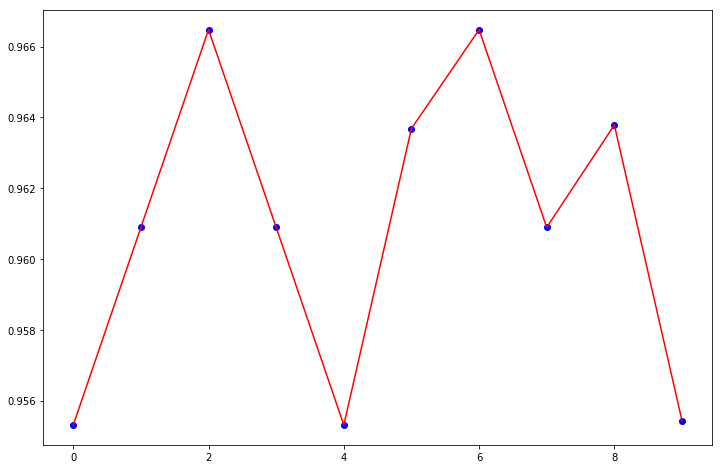

In [65]:
plt.figure(figsize=(12,8))
plt.plot(range(10), scores, 'bo', range(10), scores, 'r')
# plt.yticks(np.arange(cancer.data.shape[1]), cancer.feature_names)
plt.show()

If there is time, you can check for scores at different levels of complexity using kFold

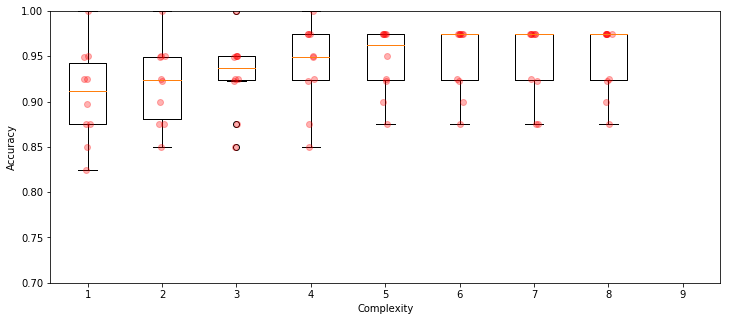

In [66]:
from sklearn import cross_validation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state = 3)

#Create a 5-fold cross validation set
kfold = StratifiedKFold(y = y_train, n_folds = 10, random_state = 1)
      
#S possible hyper-parameters to check for the decision tree
C=np.arange(2,10,)

# we'll run 9 different models, C = 1 .. 9 
acc = np.zeros((10, 9))
i=0
for train_index, test_index in kfold:
    x_train, x_test = cancer.data[train_index], cancer.data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]
    j=0
    for c in C:
        dt = RandomForestClassifier(n_estimators=500, max_leaf_nodes=c, n_jobs= -1)
        dt.fit(x_train,y_train)
        yhat = dt.predict(x_test)
        acc[i][j] = metrics.accuracy_score(yhat, y_test)
        j=j+1
    i=i+1

plt.boxplot(acc);
for i in range(9):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

# print ('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
# print ('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
# print ('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))
plt.ylim((0.7,1.))
fig = plt.gcf()
fig.set_size_inches(12,5)
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.savefig("model_selection.png",dpi=300, bbox_inches='tight')